# NSE TIME SERIES ANALYSIS

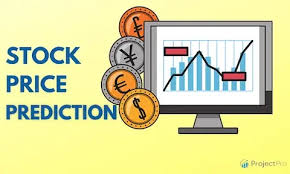

Group Members.
1. Brenda Mutai - Group Lead
2. Justin Mbugua
3. Sharon Momanyi
4. Stephen Munyiala

# Project Summary.
This project focuses on analyzing stock price movements across all publicly listed companies on the Nairobi Securities Exchange (NSE) over the years 2023 and 2024.

Using daily trading data — including prices, trading volume, Sector information — the project aims to provide actionable insights into market trends, stock performance, sector dynamics, and trading patterns.

The analysis aims to help investors, analysts, and researchers better understand market behavior and identify opportunities within the Kenyan stock market.

# Business Understanding
Investors and financial institutions operating on the Nairobi Securities Exchange (NSE) rely on precise information to make strategic decisions regarding stock trades. By forecasting future stock prices and identifying market trends, they can optimize investment strategies, improve portfolio management, and effectively mitigate risks. Such insights empower traders to seize profitable opportunities, avoid potential losses, and enhance overall financial stability.  
  
Additionally, predictive models enable investors to understand market behavior better, adapt to changing conditions, and maintain a competitive edge. With tools for analyzing historical trading data, stakeholders can uncover patterns, assess the impact of external factors like economic policies or global market shifts, and make data-driven choices that align with their financial goals. These advancements are essential for thriving in a dynamic stock market environment like the NSE.
#### Challenges faced today:
- Manual analysis of stock patterns is time-consuming.
- Investors react to market events after they occur, not proactively.
- Lack of predictive models tuned specifically for NSE stock behaviors (which may differ from US/EU markets).



##Objectives
Mainly to Develop time series models to forecast future stock prices.

1. To provide insights into which stocks might perform well based on historical trends and predictive models, which will allow for more informed decision-making.

2. To offer short-term predictions of stock prices or trends to support timely buy/sell decisions, potentially improving their profitability.

3. To democratize Access to NSE Analytics thus making it easier for ordinary people to track and engage with stocks and securities.

## Stakeholders
1. Retail Investors: Use forecasts for making buy/sell decisions.

2. Financial Analysts: Integrate model outputs into broader financial analysis workflows.

3. Portfolio Managers: Optimize asset allocation strategies.

## Data Understanding.
The data is a compilation of historical daily stock market price data relates to the Kenyan Nairobi Securities Exchange (NSE) for 2023 and 2024. It was sourced from https://data.mendeley.com/(Kenya Nairobi Securities Exchange (NSE) All Stocks Prices 2023-2024)

The data was scrapped from a publicly accessible website (http://live.mystocks.co.ke/) licensed by NSE by exporting raw web data to spreadsheets, then cleaned  up to a final CSV.

Each stock data row has 13 data columns (1)Date (2)Stock Code (3)Stock Name (4)12-month Low price (5)12-month High price (6)Day's Low price (7)Day's High price (8)Day's Final Price (9)Previous traded price (10)Change in price value (11)Change in price % (12)Volume traded (13)Adjusted price.  One additional CSV file is also provided to show the stocks market sector, with 3 columns as: (1)Market sector (2)Stock Code (3)Stock Name.

## Metric of success.
1. Model Performance: Accuracy of stock price forecasts measured by metrics like Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), or R-squared.
2. Insight Utility: The relevance and actionability of the identified market trends, sector performance analyses, and trading patterns for stakeholder decision-making (Qualitative).
3. Completeness: Successful analysis covering the specified timeframe (2023-2024) and scope (all listed companies, key data points).

## 1. Dataset loading.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Loading the data
data_2023 = pd.read_csv('NSE_data_all_stocks_2023.csv')
data_2024 = pd.read_csv('NSE_data_all_stocks_2024.csv')

In [3]:
sectors = pd.read_csv('NSE_data_stock_market_sectors_2023_2024.csv')

Since the NSE data for 2023, 2024 and the respective sectors is loaded in different data frames, we need to merge it into a single dataframe.

In [4]:
# Merging the data files
nse_data = pd.concat([data_2023, data_2024], ignore_index = True)

In [5]:
nse_data = nse_data.merge(sectors, left_on = 'Code', right_on = 'Stock_code', how = 'left')
nse_data.drop(columns = ['Stock_code','Stock_name'], axis = 1, inplace = True)

In [6]:
nse_data

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,Sector
0,03-Jan-2023,EGAD,Eaagads Ltd,10.35,14.50,10.50,10.50,10.50,10.50,-,-,"1,900.00",-,Agricultural
1,03-Jan-2023,KUKZ,Kakuzi Plc,342.00,440.00,385.00,385.00,385.00,385.00,-,-,-,-,Agricultural
2,03-Jan-2023,KAPC,Kapchorua Tea Kenya Plc,207.00,280.00,115.75,115.75,115.75,113.25,2.5,2.21%,100.00,-,Agricultural
3,03-Jan-2023,LIMT,Limuru Tea Plc,365.00,380.00,420.00,420.00,420.00,420.00,-,-,-,-,Agricultural
4,03-Jan-2023,SASN,Sasini Plc,15.10,22.00,22.00,22.50,22.45,22.45,-,-,"6,900.00",-,Agricultural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35388,31-Dec-24,^N25I,NSE 25-Share Index,2364.29,"3,457.87","3,402.80","3,402.80","3,402.80","3,380.24",22.56,0.67%,-,-,Indices
35389,31-Dec-24,^NASI,NSE All-Share Index,90.1,125.34,123.48,123.48,123.48,123.12,0.36,0.29%,-,-,Indices
35390,31-Dec-24,^NBDI,NSE Bonds Index,986.46,"1,108.71","1,107.41","1,107.41","1,107.41","1,093.87",13.54,1.24%,-,-,NaN
35391,31-Dec-24,^ZKEQTK,Zamara Kenya Equity Index (KES),1535.23,"2,547.58","2,519.80","2,519.80","2,519.80","2,495.28",24.52,0.98%,-,-,Indices


2. Data Cleaning.

The data appears to have several missing values. Next we check for the dataframe information to find out how many missing values are in each column. This is important when deciding how we'll deal with the missing values.

In [7]:
nse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35393 entries, 0 to 35392
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35393 non-null  object
 1   Code            35393 non-null  object
 2   Name            35393 non-null  object
 3   12m Low         35393 non-null  object
 4   12m High        35393 non-null  object
 5   Day Low         35393 non-null  object
 6   Day High        35393 non-null  object
 7   Day Price       35393 non-null  object
 8   Previous        35393 non-null  object
 9   Change          35393 non-null  object
 10  Change%         35393 non-null  object
 11  Volume          35393 non-null  object
 12  Adjusted Price  35393 non-null  object
 13  Sector          35202 non-null  object
dtypes: object(14)
memory usage: 3.8+ MB


In [8]:
# Checking for null values
nse_data.isnull().sum()

Date                0
Code                0
Name                0
12m Low             0
12m High            0
Day Low             0
Day High            0
Day Price           0
Previous            0
Change              0
Change%             0
Volume              0
Adjusted Price      0
Sector            191
dtype: int64

The empty values are not interpreted as missing values because they are currently represented as '-'. We'll first have to change this to NaN to see how many values are missing.

In [9]:
# Replace '-' with NaN
nse_data.replace('-', pd.NA, inplace = True)
nse_data.isnull().sum()

Date                  0
Code                  0
Name                  0
12m Low               0
12m High              0
Day Low               0
Day High              0
Day Price             0
Previous              1
Change            14124
Change%           14149
Volume            12894
Adjusted Price    35393
Sector              191
dtype: int64

To prepare the numeric columns for analysis, we first need to clean them by removing any commas and spaces before converting them to numeric.

In [10]:
# Columns to exclude from numeric cleaning
exclude_cols = ['Code', 'Name', 'Sector', 'Date', 'Change%']

# Clean all other columns
for col in nse_data.columns:
    if nse_data[col].dtype == 'object' and col not in exclude_cols:
        nse_data[col] = nse_data[col].str.replace(',', '')
        nse_data[col] = pd.to_numeric(nse_data[col], errors = 'coerce')

# Remove the '%' sign and convert Change% to numeric
nse_data['Change%'] = nse_data['Change%'].str.replace('%', '', regex = False)
nse_data['Change%'] = pd.to_numeric(nse_data['Change%'], errors = 'coerce')

In [11]:
# Convert numeric columns
num_cols = ['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Volume', 'Change']
nse_data[num_cols] = nse_data[num_cols].apply(pd.to_numeric, errors = 'coerce')

In [12]:
# Rechecking for null values
nse_data.isnull().sum()

Date                  0
Code                  0
Name                  0
12m Low               0
12m High              0
Day Low               0
Day High              0
Day Price             0
Previous              1
Change            14124
Change%           14149
Volume            12894
Adjusted Price    35393
Sector              191
dtype: int64

Now the missing values are correctly interpreted and the columns with numeric values have been successfully. We also have to change the date from string format to datetime. Since the date in the 2023 dataset has the dayfirst while the date in the 2024 dataset has the month first, we'll use a function that accounts for this.

In [13]:
# Converting to datetime
def safe_parse_date(date_str):
    try:
        if '2023' in date_str:
            return pd.to_datetime(date_str, dayfirst = True)
        else:
            return pd.to_datetime(date_str, dayfirst = False)
        # else:
        #     return pd.to_datetime(date_str, dayfirst = True)
    except:
        return pd.NaT

# Apply the function
nse_data['Date'] = nse_data['Date'].apply(safe_parse_date)

In [14]:
# Recheck missing values
nse_data.isnull().sum()

Date                  0
Code                  0
Name                  0
12m Low               0
12m High              0
Day Low               0
Day High              0
Day Price             0
Previous              1
Change            14124
Change%           14149
Volume            12894
Adjusted Price    35393
Sector              191
dtype: int64

All values in the 'Date' column have been successfully converted to datetime format. Now we can deal with missing values. We'll do this by:
- Dropping the **Adjusted Price** column because it doesn't contain any values.
- Replacing the missing values in the **Sector** column with 'Unknown'.
- Dropping missing values from the **Previous** column which has a very small number of missing values.
- Filling the missing values in the **Change** and **Change%** columns by calculating the values.
- Replacing the missing values in the **Volume** column with the median for each stock.

In [15]:
# Drop adjusted price column
nse_data.drop('Adjusted Price', axis = 1, inplace = True)

nse_data = nse_data[~nse_data['Sector'].isna()]

# Dropping rows with missing values from the 'Previous' column
nse_data = nse_data.dropna(subset = ['Previous']).reset_index()

# Filling missing values for change and change%
nse_data['Change'] = nse_data['Change'].fillna(nse_data['Day Price'] - nse_data['Previous'])
nse_data['Change%'] = nse_data['Change%'].fillna((nse_data['Change'] / nse_data['Previous']) * 100)

In [16]:
# Replacing the missing values in the 'Volume' column with the median for each stock.
nse_data['Volume'] = nse_data.groupby('Code')['Volume'].transform(lambda x: x.fillna(x.median()))

In [17]:
missing_volume_stocks = nse_data[nse_data['Volume'].isna()]['Code'].unique()

# Then, filter out those stocks
nse_data = nse_data[~nse_data['Code'].isin(missing_volume_stocks)].reset_index(drop = True)

print("Remaining missing Volume values:", nse_data['Volume'].isna().sum())
print("Remaining rows:", nse_data.shape[0])

Remaining missing Volume values: 0
Remaining rows: 28972


In [18]:
#Rechecking the missing value.
nse_data.isnull().sum()

index        0
Date         0
Code         0
Name         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Sector       0
dtype: int64

**Checking for outliers.**
Checking for outliers is also important to get more information about the dataset. We won't remove these outliers because financial data is volatile by nature so outliers are common and therefore most outliers are natural market behaviour rather than errors.

In [19]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

num_cols = ['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Change', 'Volume']

# Applying the function to numerical columns
for col in num_cols:
    outliers = detect_outliers_iqr(nse_data, col)
    print(f'{col}: {len(outliers)} outliers')

12m Low: 4920 outliers
12m High: 4833 outliers
Day Low: 5018 outliers
Day High: 4954 outliers
Day Price: 4979 outliers
Previous: 4981 outliers
Change: 8850 outliers
Volume: 5140 outliers


Outlier Report:

Several numerical columns contain a significant number of outliers. 'Day Low' has the highest number of outliers (5018), followed closely by 'Day Price' (4979) and 'Previous' (4981). '12m Low' (4920), '12m High' (4833), 'Day High' (4954), and 'Volume' (5140) also exhibit a substantial number of outliers. The 'Change' column shows the most outliers with 8850. This indicates potential data anomalies or high variability in these price and volume metrics.

## 3. Exploratory Data Analysis.

### 3.1 Univariate Analysis

In [20]:
nse_data.describe()

,index,Date,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume
count,28972.000000,28972,28972.000000,28972.000000,28972.000000,28972.000000,28972.000000,28972.000000,28972.000000,28972.000000,2.897200e+04
mean,17580.714310,2024-01-01 02:35:34.253762048,86.693345,117.788910,96.378963,97.020524,96.668781,96.620243,0.048539,1.697154,7.641631e+05
min,0.000000,2023-01-03 00:00:00,0.160000,0.230000,0.160000,0.170000,0.170000,0.170000,-250.000000,0.000000,1.000000e+02
25%,8724.750000,2023-07-04 00:00:00,2.580000,4.110000,3.350000,3.450000,3.400000,3.400000,-0.040000,0.000000,6.000000e+02
50%,17520.500000,2024-01-05 00:00:00,11.000000,18.450000,13.500000,13.800000,13.600000,13.600000,0.000000,0.550000,4.400000e+03
75%,26414.250000,2024-07-04 00:00:00,30.000000,55.750000,37.500000,38.400000,37.950000,37.912500,0.040000,2.340000,4.600000e+04
max,35385.000000,2024-12-31 00:00:00,2625.000000,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000,310.000000,66.260000,2.084859e+08
std,10213.212374,NaN,343.642494,435.270756,365.197444,365.343663,365.254025,364.986422,4.580451,2.539828,4.385783e+06


Price Metrics ('12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous'): Exhibit similar central tendencies (means around 86-97) and ranges, with maximum values reaching around 3330. The standard deviations are also comparable, indicating similar levels of price volatility.

Change: The average price change is slightly positive (0.0485), with a wide range from -250 to 310.

Change%: Shows a positive average percentage change (1.697), with a range from 0% to a maximum of 66.26%.

Volume: The average trading volume is approximately 7.64 million, with a significant range from 100 to over 20 billion. The high standard deviation indicates substantial variability in trading volume.

The 'std' for the 'Date' column is 'NaN', which is expected for non-numerical data.

### Distribution of Numerical Columns

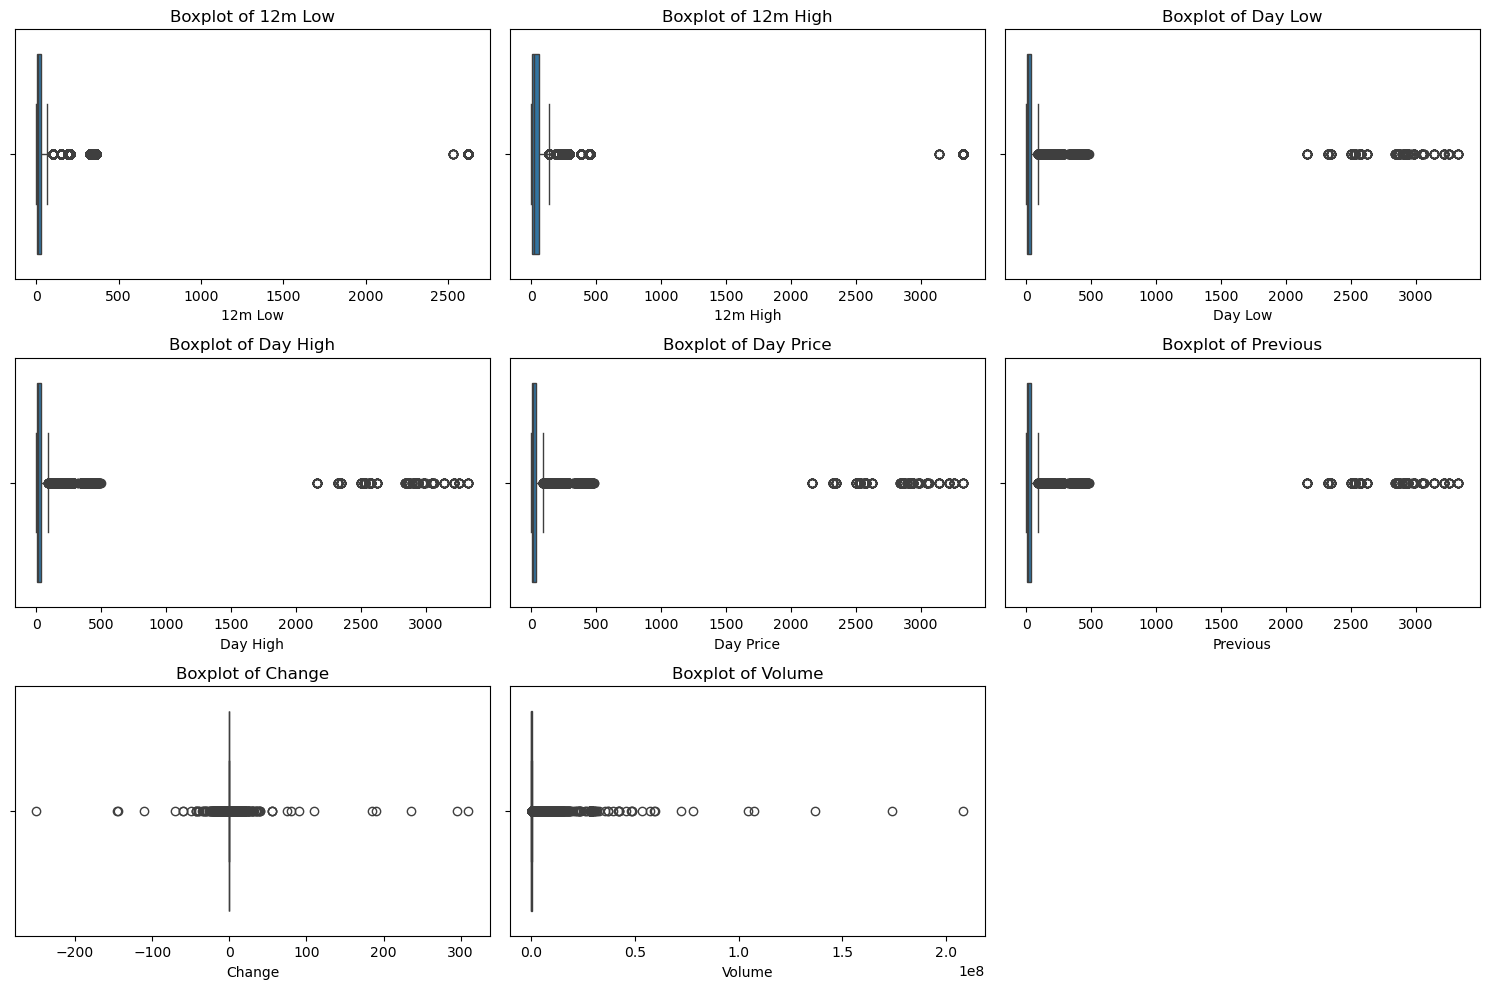

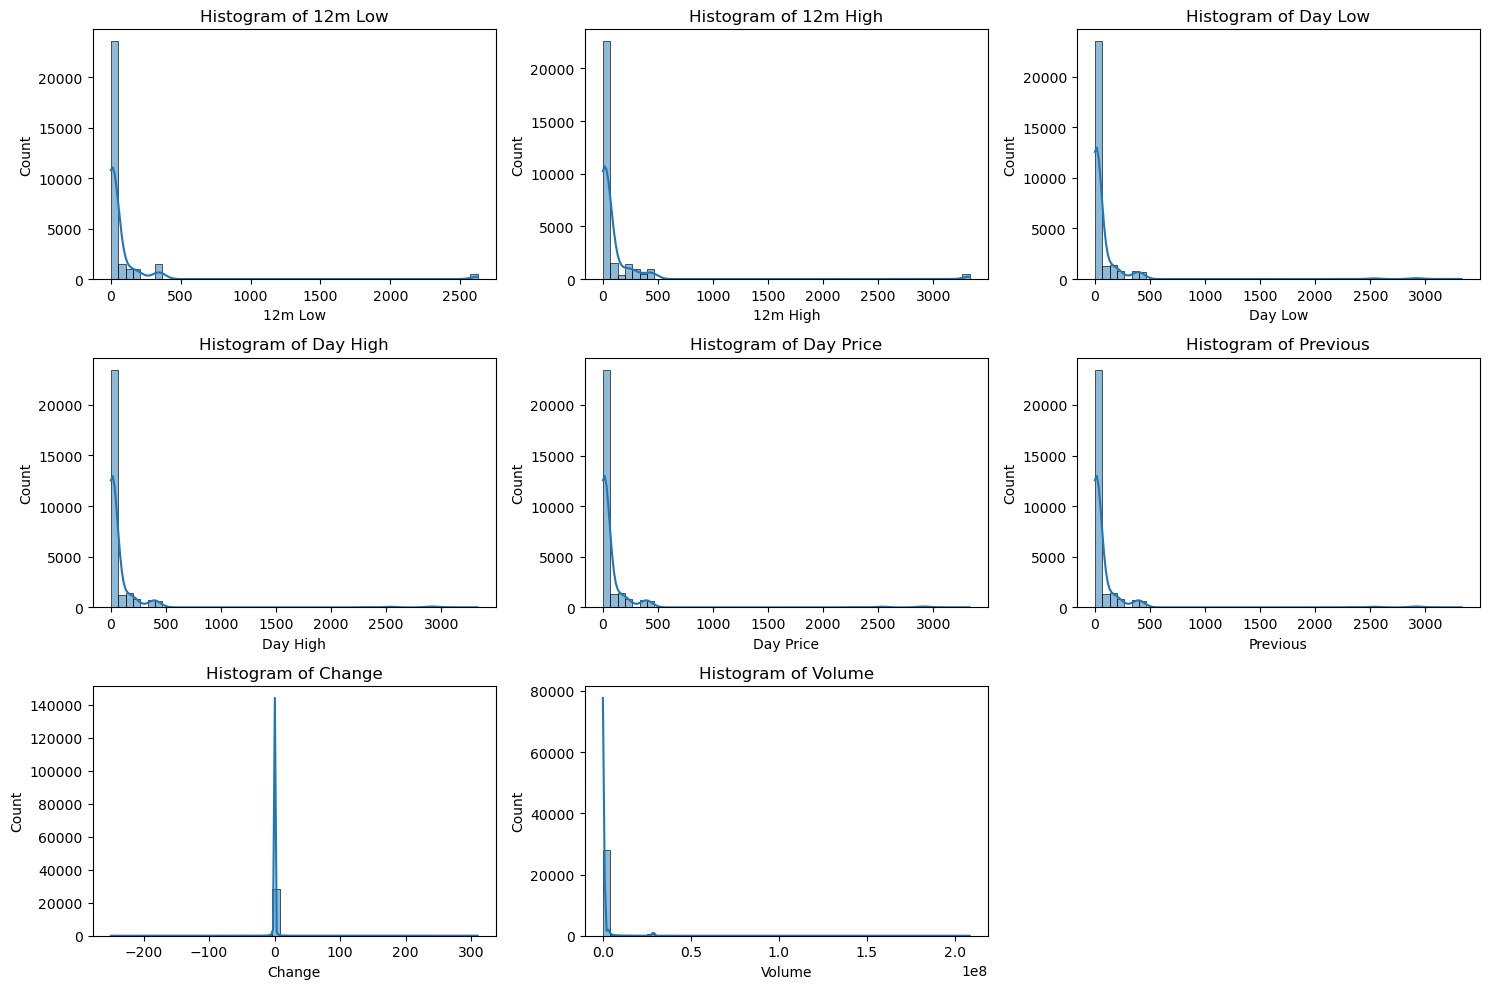

In [21]:
plt.figure(figsize = (15, 10))

# Boxplot for each numerical column
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x = nse_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Histogram for each numerical column
plt.figure(figsize = (15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(nse_data[col], kde = True, bins = 50)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


12-Month Highs/Lows & Daily Low Prices: Most values are concentrated at the lower end, forming a right-skewed distribution with occasional extreme highs.

Daily High, Closing Price, Previous Close: Lower prices dominate, while higher values occur infrequently, reinforcing the skewed nature of price movements.


Price variables show consistent right-skewed trends, meaning lower values are more frequent, while extreme highs act as potential outliers.

Distribution of Change: Most price changes cluster around zero, indicating that the most frequent scenario is no change. Small variations extend symmetrically between -250 to +300, with a central peak dominating.

Price change distribution suggests stability, as unchanged values are most common.

Trading volume varies significantly, with rare surges of high activity impacting market behavior.


### 3.2 Bivariate Analysis.

Top 10 Stocks by Volume and Price Change

In [22]:
top_volume_stocks = nse_data.groupby('Code')['Volume'].sum().sort_values(ascending = False).head(10)
print(f"Top 10 stocks by total volume:\n{top_volume_stocks}")

# Top 10 stocks by price change (Change%)
top_change_stocks = nse_data.groupby('Code')['Change%'].sum().sort_values(ascending = False).head(10)
print(f"Top 10 stocks by total price change:\n{top_change_stocks}")

Top 10 stocks by total volume:
Code
LAPR    1.252750e+10
SCOM    3.885936e+09
HBE     1.658820e+09
KNRE    5.744832e+08
EQTY    5.672798e+08
KCB     4.772461e+08
KEGN    4.193516e+08
KPLC    4.010562e+08
COOP    2.979090e+08
ABSA    2.354774e+08
Name: Volume, dtype: float64
Top 10 stocks by total price change:
Code
EVRD    1655.54
NBV     1558.02
TCL     1552.45
SMER    1511.99
HAFR    1493.94
UCHM    1423.78
PORT    1354.84
CABL    1349.68
LBTY    1342.77
SCAN    1272.30
Name: Change%, dtype: float64


Top 10 Stocks by Total Volume
- LAPR leads significantly with 12.5 billion in total volume.
- SCOM ranks second, trading approximately 3.9 billion shares.
- HBE, KNRE, EQTY, KCB, KEGN, KPLC, COOP, and ABSA also show substantial trading activity, with volumes ranging between 235 million and 574 million shares.

Top 10 Stocks by Total Price Change (%)
- EVRD records the highest price change at 1655.54%.
- NBV (1558.02%) and TCL (1552.45%) also exhibit significant gains.
- SMER, HAFR, UCHM, PORT, CABL, LBTY, and SCAN complete the top ten, each showing price increases above 1270%.

This analysis highlights LAPR’s dominance in trading volume and EVRD’s exceptional price growth, while several other stocks demonstrate strong market performance. Let me know if you need further refinement!


Sector Performance

 Analysis will involve checking for which sectors have the highest total volume traded and which ones have the highest average price change. This will help in understanding which sectors are the most popular in the NSE as well as how volatile each sector is.

Total volume by sector:
Sector
Investment                     1.266177e+10
Telecommunication              3.886058e+09
Banking                        1.807969e+09
Commercial and Services        1.759676e+09
Construction and Allied        1.047976e+09
Insurance                      8.723398e+08
Manufacturing and Allied       7.363690e+07
Investment Services            2.210050e+07
Agricultural                   7.348800e+06
Automobiles and Accessories    4.639000e+05
Name: Volume, dtype: float64
Average price change by sector:
Sector
Commercial and Services        2.265831
Insurance                      2.050969
Investment                     2.014205
Investment Services            1.997033
Automobiles and Accessories    1.957581
Construction and Allied        1.811127
Manufacturing and Allied       1.381655
Banking                        1.276426
Agricultural                   1.211792
Telecommunication              0.814695
Name: Change%, dtype: float64


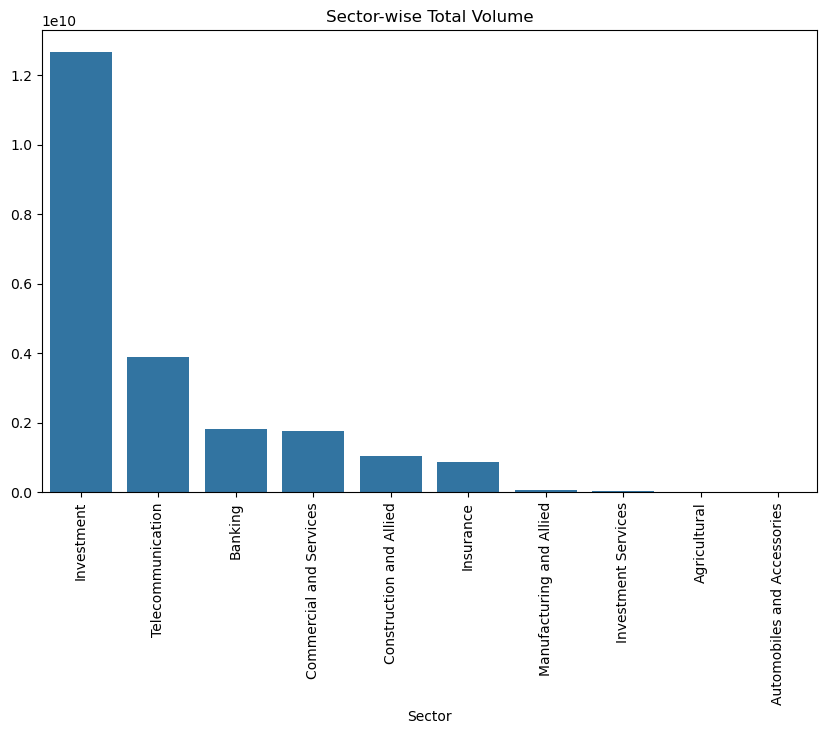

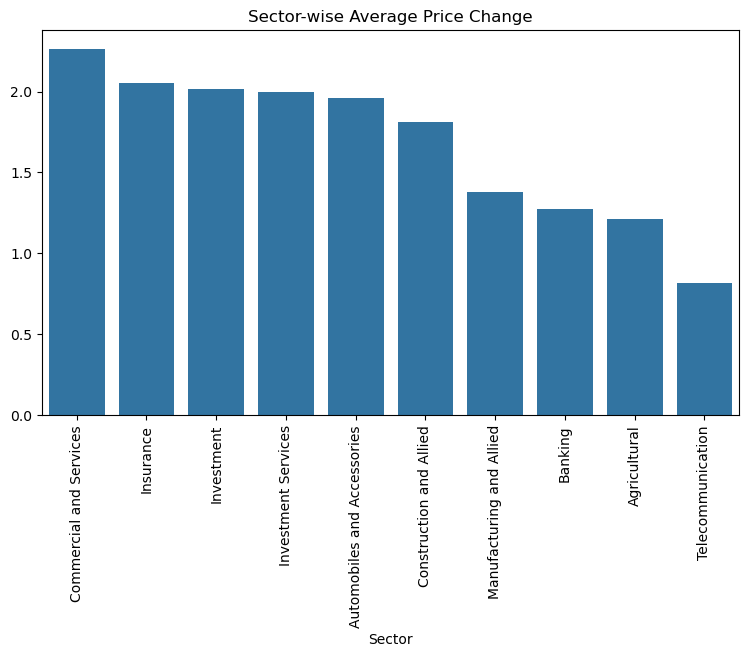

In [23]:
sector_volume = nse_data.groupby('Sector')['Volume'].sum().sort_values(ascending = False)
print(f"Total volume by sector:\n{sector_volume}")

# Calculating average price change by sector
sector_change = nse_data.groupby('Sector')['Change%'].mean().sort_values(ascending = False)
print(f"Average price change by sector:\n{sector_change}")

# Sector volume
plt.figure(figsize = (10, 6))
sns.barplot(x = sector_volume.index, y = sector_volume.values)
plt.xticks(rotation = 90)
plt.title('Sector-wise Total Volume')
plt.show()

# Sector average price change
plt.figure(figsize = (9, 5))
sns.barplot(x = sector_change.index, y = sector_change.values)
plt.xticks(rotation = 90)
plt.title('Sector-wise Average Price Change')
plt.show()

The Telecommunication sector dominates in terms of overall trading activity, with a volume significantly higher than any other sector. The Banking and Commercial & Services sectors also show substantial trading interest. The remaining sectors have considerably lower total trading volumes in comparison.

The Investment sector shows the most significant average upward price movement. Interestingly, the Telecommunication sector, which had the highest total trading volume, displays the lowest average percentage price change among all listed sectors. This suggests that high trading volume doesn't necessarily translate to large average price increases.


Price and Volume Trends Over Time

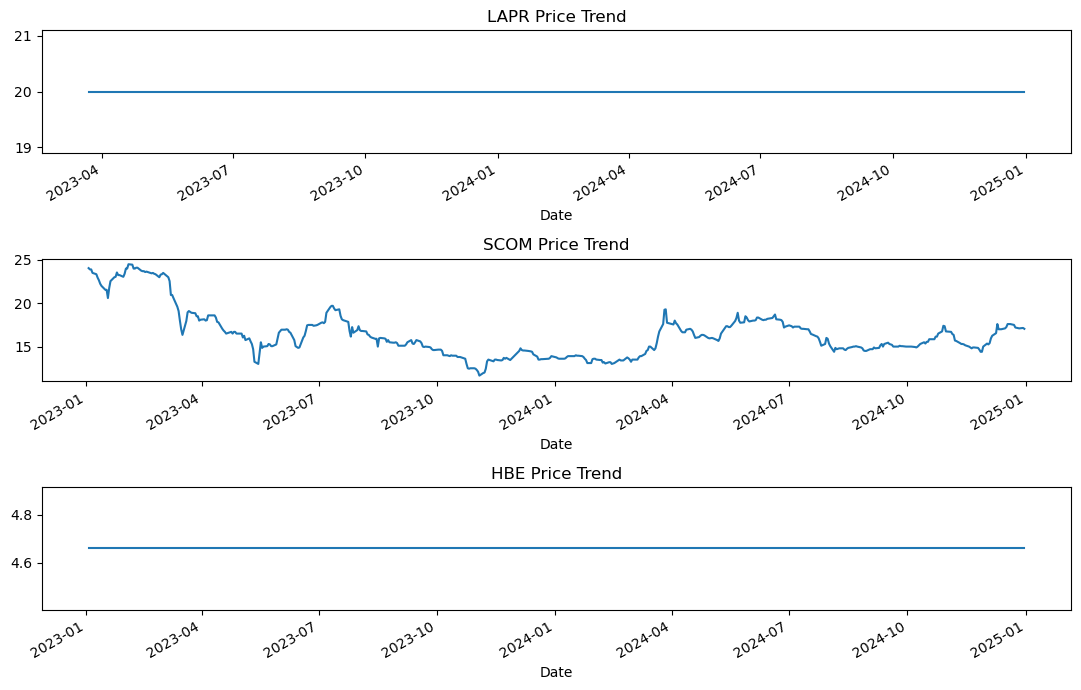

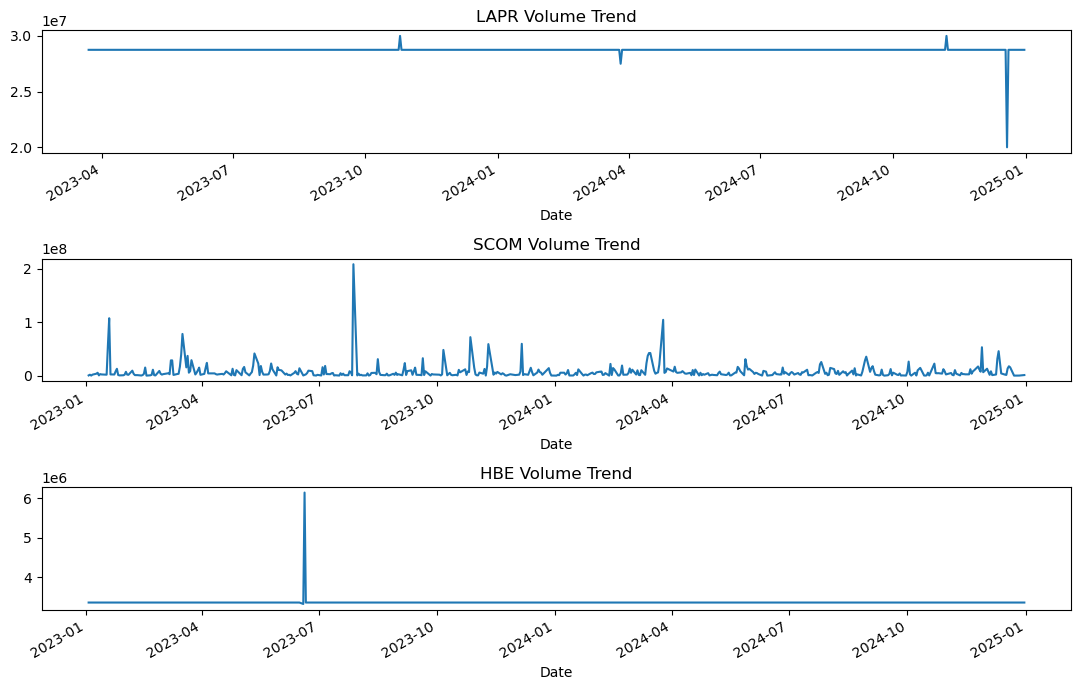

In [24]:
# Plotting the price trends for top 3 stocks by volume
sample_stocks = top_volume_stocks.index[:3]

plt.figure(figsize = (11, 7))
for i, stock in enumerate(sample_stocks, 1):
    plt.subplot(3, 1, i)
    stock_data = nse_data[nse_data['Code'] == stock]
    stock_data.set_index('Date')['Day Price'].plot(title = f'{stock} Price Trend')
plt.tight_layout()
plt.show()

# Volume trends for top 3 stocks
plt.figure(figsize = (11, 7))
for i, stock in enumerate(sample_stocks, 1):
    plt.subplot(3, 1, i)
    stock_data = nse_data[nse_data['Code'] == stock]
    stock_data.set_index('Date')['Volume'].plot(title = f'{stock} Volume Trend')
plt.tight_layout()
plt.show()

LAPR and HBE exhibit price stability over the analyzed timeframe.
SCOM's price has been more dynamic, experiencing a notable downturn in 2023 followed by a period of fluctuation and a slight recovery trend into 2025.

LAPR consistently experiences high trading volume, suggesting sustained investor interest.
SCOM's trading volume is more sporadic, with occasional surges in activity.
HBE generally has low trading volume, with a single, significant volume spike during the observed period.

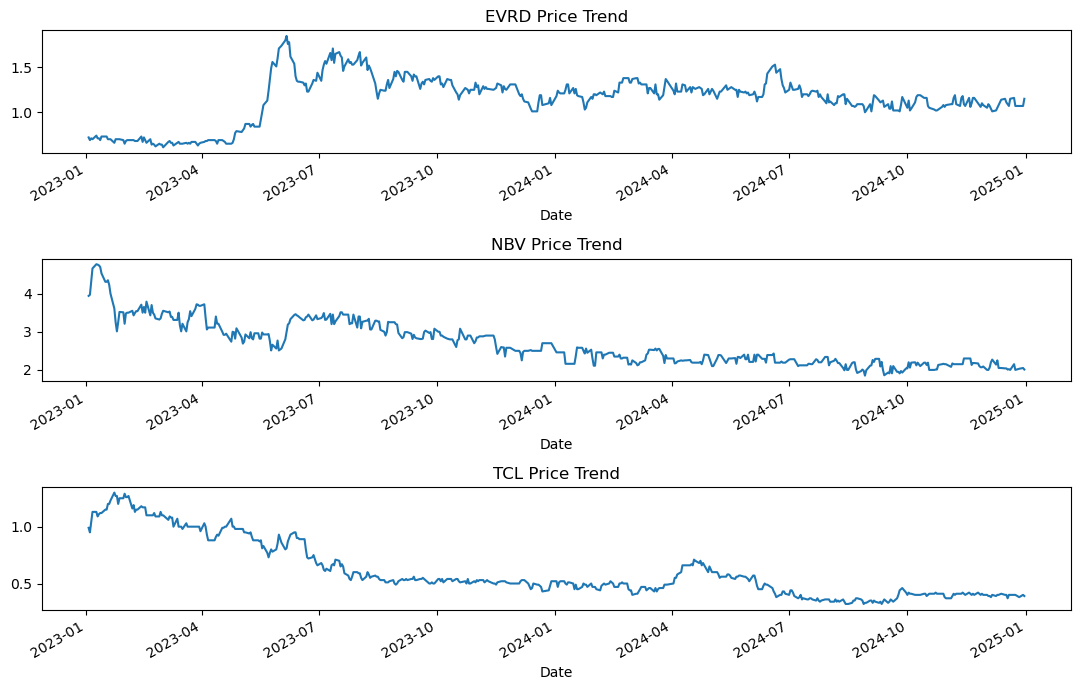

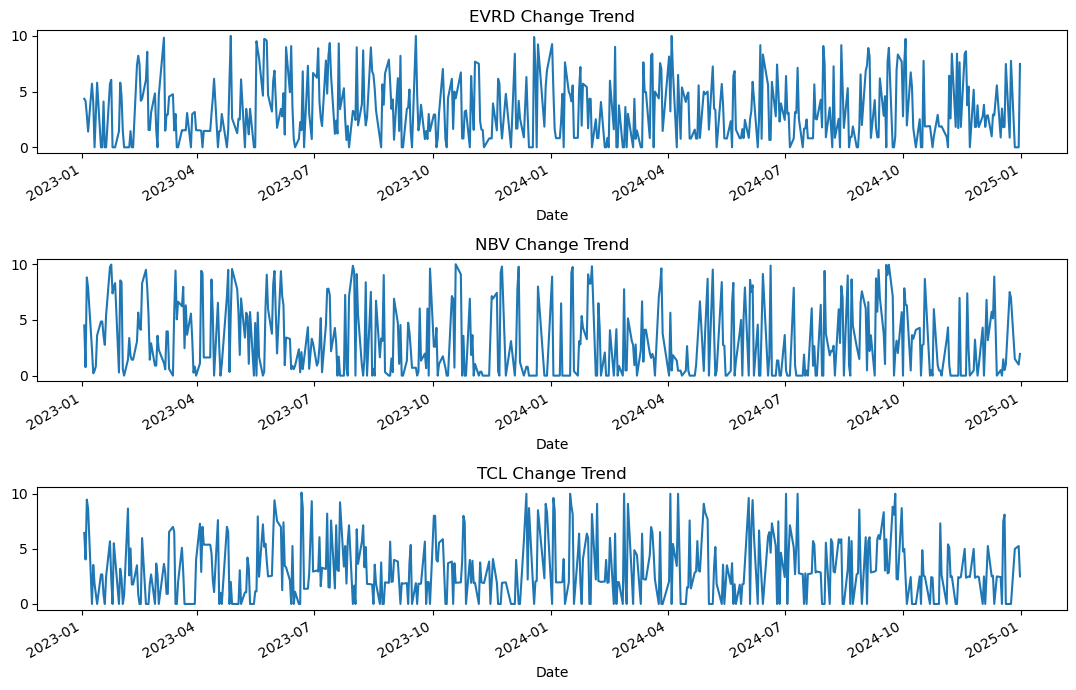

In [25]:
# Plotting the price trends for top 3 by change
sample_stocks = top_change_stocks.index[:3]

plt.figure(figsize = (11, 7))
for i, stock in enumerate(sample_stocks, 1):
    plt.subplot(3, 1, i)
    stock_data = nse_data[nse_data['Code'] == stock]
    stock_data.set_index('Date')['Day Price'].plot(title = f'{stock} Price Trend')
plt.tight_layout()
plt.show()

# Volume trends for top 3 stocks
plt.figure(figsize = (11, 7))
for i, stock in enumerate(sample_stocks, 1):
    plt.subplot(3, 1, i)
    stock_data = nse_data[nse_data['Code'] == stock]
    stock_data.set_index('Date')['Change%'].plot(title = f'{stock} Change Trend')
plt.tight_layout()
plt.show()

EVRD experienced a significant mid-period surge followed by a decline, indicating a period of high volatility.
NBV showed a consistent downward trend in its price over the analyzed period.
TCL also exhibited a general downward price trend, with a notable low point in late 2024 and a minor recovery towards the end of the observed timeframe.

EVRD is a potential candidate for trading strategies requiring stable liquidity.
NBV may warrant further investigation for event-based trading or sentiment analysis.
TCL may require monitoring for strategic decisions regarding portfolio rebalancing or exit.

### 3.3 Multivariate Analysis

Correlation Analysis

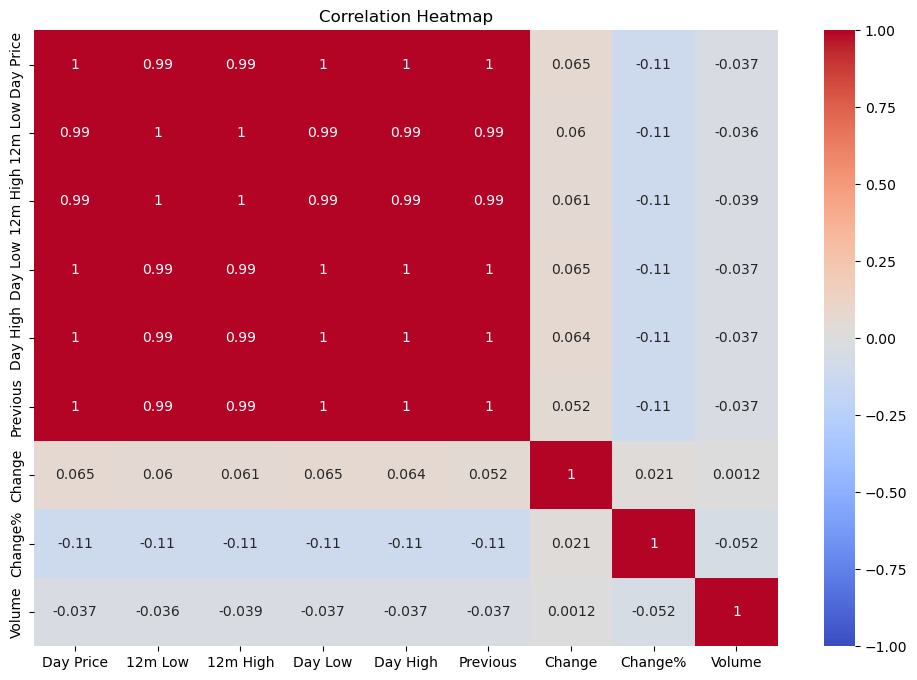

In [26]:
correlation_matrix = nse_data[['Day Price', '12m Low', '12m High', 'Day Low', 'Day High', 'Previous', 'Change', 'Change%', 'Volume']].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Heatmap')
plt.show()

The various price points ('Day Price', '12m Low', '12m High', 'Day Low', 'Day High', 'Previous') are highly interdependent.

Price changes (both absolute and percentage) have a weak relationship with the price levels themselves.

Trading volume appears to be largely uncorrelated with price levels and absolute price changes, showing only a very minor negative association with percentage price changes.

## 4. Feature Engineering.

#### I. Moving Averages(SMA and EMA)

We calculate 10-day and 50-day Simple Moving Averages(SMA), as well as the 10-day and 50-day Exponential Moving Averages(EMA), to highlight trends.

In [27]:
nse_data['SMA_10'] = nse_data['Day Price'].rolling(window = 10).mean()
nse_data['SMA_50'] = nse_data['Day Price'].rolling(window = 50).mean()
nse_data['EMA_10'] = nse_data['Day Price'].ewm(span = 10, adjust = False).mean()
nse_data['EMA_50'] = nse_data['Day Price'].ewm(span = 50, adjust = False).mean()

**SMA_10** and **SMA_50**: Simple moving averages over 10 and 50 trading days.  
**EMA_10** and **EMA_50**: Exponential moving averages over 10 and 50 days (more weight to recent prices).

In [28]:
nse_data.isnull().sum()

index         0
Date          0
Code          0
Name          0
12m Low       0
12m High      0
Day Low       0
Day High      0
Day Price     0
Previous      0
Change        0
Change%       0
Volume        0
Sector        0
SMA_10        9
SMA_50       49
EMA_10        0
EMA_50        0
dtype: int64

The 'SMA_10' and 'SMA_50' columns have null values because the rolling window calculation can't compute a value for the first few rows of the dataset.
- **SMA_10** has null values for the first 9 rows because there aren't enough previous values to calculate the moving average for a 10-day window and **SMA_50** has null values for the first 49 rows for the same reason.
- We'll fill the first few missing values with the first valid value.

In [29]:
nse_data[['SMA_10', 'SMA_50']] = nse_data[['SMA_10', 'SMA_50']].fillna(method = 'bfill')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3580\1062863226.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nse_data[['SMA_10', 'SMA_50']] = nse_data[['SMA_10', 'SMA_50']].fillna(method = 'bfill')


In [30]:
nse_data.isnull().sum()

index        0
Date         0
Code         0
Name         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Sector       0
SMA_10       0
SMA_50       0
EMA_10       0
EMA_50       0
dtype: int64

#### II. Relative Strength Index(RSI).
The RSI measures the speed and change of price movements. Values above 70 indicate that a stock is overbought while values below 30 indicate that it's oversold.

In [31]:
# function to calculate the RSI
def compute_rsi(data, window = 14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window = window).mean()
    avg_loss = loss.rolling(window = window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Applying the function
nse_data['RSI'] = compute_rsi(nse_data['Day Price'])

In [32]:
nse_data.isnull().sum()

index         0
Date          0
Code          0
Name          0
12m Low       0
12m High      0
Day Low       0
Day High      0
Day Price     0
Previous      0
Change        0
Change%       0
Volume        0
Sector        0
SMA_10        0
SMA_50        0
EMA_10        0
EMA_50        0
RSI          13
dtype: int64

The RSI also has null values that we'll fill the same as the SMA.

In [33]:
# Filling the missing RSI values with the first valid RSI value
nse_data['RSI'] = nse_data['RSI'].fillna(nse_data['RSI'].iloc[13])

In [34]:
#Checking for the missing value.
nse_data.isnull().sum()

index        0
Date         0
Code         0
Name         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Sector       0
SMA_10       0
SMA_50       0
EMA_10       0
EMA_50       0
RSI          0
dtype: int64

## 5. Modeling

To carry out forecasting, a combination of ARIMA, XGBoost, and LSTM models was utilized, each offering distinct advantages in time series analysis. ARIMA (AutoRegressive Integrated Moving Average) is a traditional statistical model well-suited for capturing linear patterns and trends in sequential data. XGBoost, a powerful gradient boosting algorithm, enhances predictive accuracy by learning complex relationships and leveraging feature importance. Meanwhile, LSTM (Long Short-Term Memory), a deep learning model, excels in capturing long-term dependencies and nonlinear patterns in sequential data, making it particularly effective for handling volatile financial time series. Together, these models provide a comprehensive approach to forecasting, balancing statistical rigor, machine learning adaptability, and deep learning capabilities.


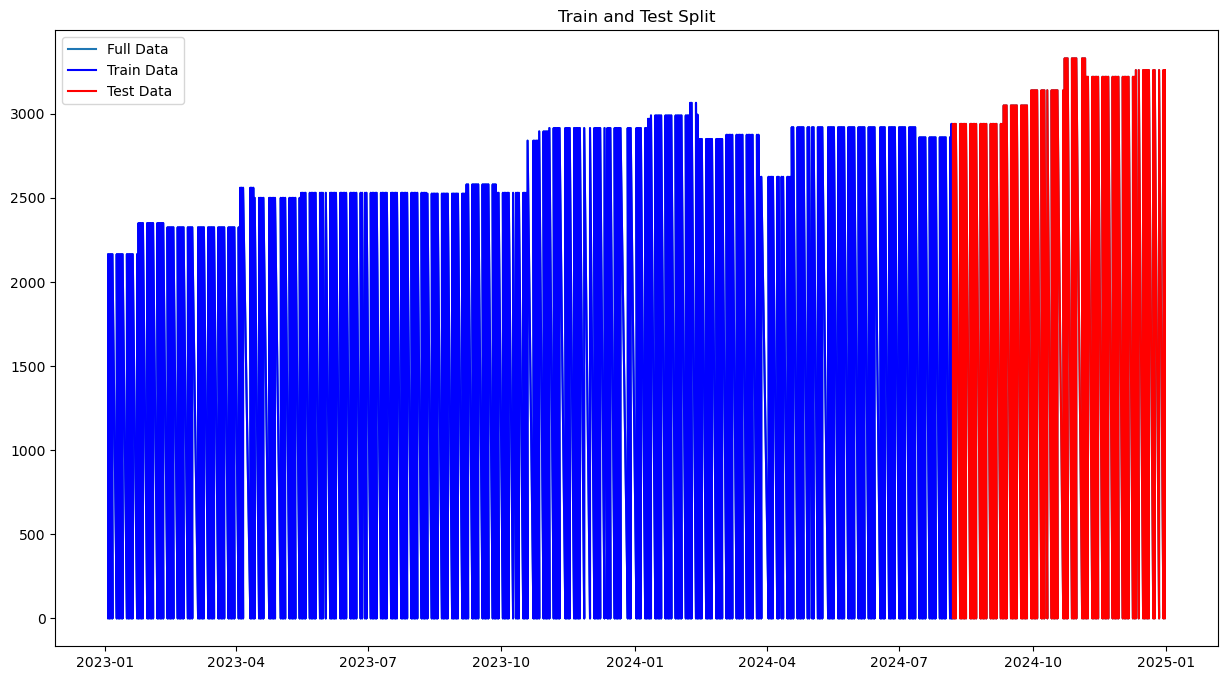

In [35]:
train_size = int(len(nse_data) * 0.8)
train_data, test_data = nse_data['Day Price'][:train_size], nse_data['Day Price'][train_size:]

# Plot the training and testing sets
plt.figure(figsize = (15,8))
plt.plot(nse_data['Date'], nse_data['Day Price'], label = 'Full Data')
plt.plot(nse_data['Date'][:train_size], train_data, label = 'Train Data', color = 'blue')
plt.plot(nse_data['Date'][train_size:], test_data, label = 'Test Data', color = 'red')
plt.legend()
plt.title('Train and Test Split')
plt.show()

The data has been split chronologically, which is typical for time series analysis to maintain the temporal order of events.

The training set is significantly larger than the testing set, which is a common practice to provide the model with sufficient data for learning patterns.

The testing set represents the more recent period, allowing for evaluation of the model's ability to forecast or generalize to unseen future data.

5.1 ARIMA

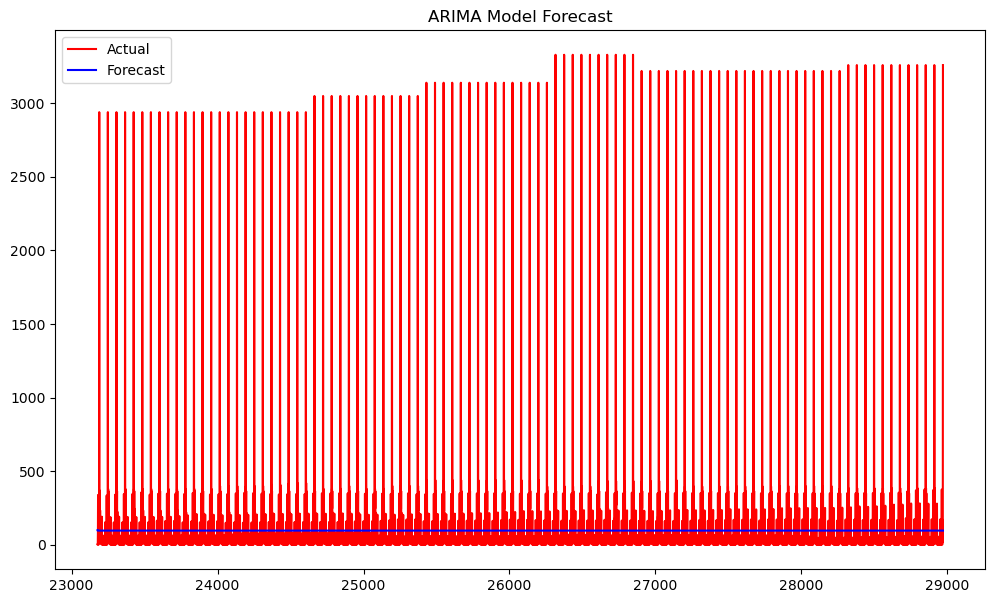

Mean Absolute Error (MAE): 142.14772854118613
Mean Squared Error (MSE): 168214.2881607688
Root Mean Squared Error (RMSE): 410.13935212409064


In [36]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fiting ARIMA
model = ARIMA(train_data, order = (1, 1, 1))
model_fit = model.fit()

# Make predictions on the test set
forecast = model_fit.forecast(steps = len(test_data))

# Plotting against test data
plt.figure(figsize = (12,7))
plt.plot(test_data.index, test_data, label = 'Actual', color = 'red')
plt.plot(test_data.index, forecast, label = 'Forecast', color = 'blue')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()

# Model evaluation using rmse and mse and mae
mae = mean_absolute_error(test_data, forecast)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(test_data, forecast)
print(f'Mean Squared Error (MSE): {mse}')

rmse = mse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

The ARIMA model, in this instance, appears to be a poor fit for the data. It fails to capture both the underlying increasing trend and the significant cyclical patterns present in the actual values.

The extremely high MSE and RMSE values quantitatively confirm the poor performance of the model in forecasting this particular time series.

Further investigation into different model parameters, other time series models, or the inclusion of exogenous variables might be necessary to achieve a more accurate forecast.

## XGBoost

XGBoost MSE: 7.438018426040975
XGBoost R-squared: 0.9999451868094493
XGBoost RMSE: 2.727273075077187
XGBoost MAE: 1.0212647958719288


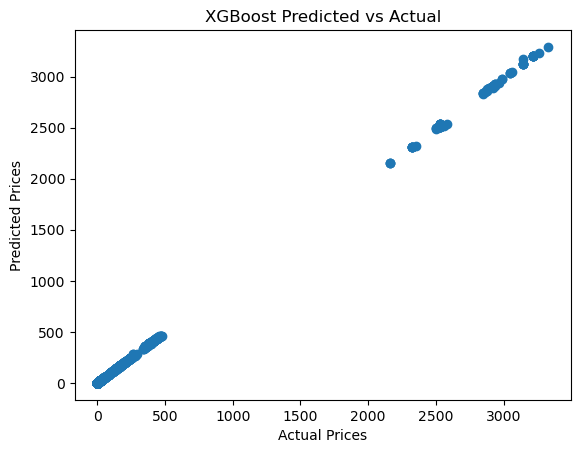

In [37]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Use features from the dataframe for the model
features = ['12m Low', '12m High', 'Day Low', 'Day High', 'Previous', 'Change', 'Change%', 'Volume', 'SMA_10', 'SMA_50', 'EMA_10', 'EMA_50', 'RSI']
X = nse_data[features]
y = nse_data['Day Price']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fitting the model
xgb_model = XGBRegressor(n_estimators = 100, learning_rate = 0.05, max_depth = 5)
xgb_model.fit(X_train, y_train)

# predictions
y_pred_xgb = xgb_model.predict(X_test)

# Model evaluation using rmse, mse, r2 and mae
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_xgb)

print(f'XGBoost MSE: {mse}')
print(f'XGBoost R-squared: {r2}')
print(f'XGBoost RMSE: {rmse}')
print(f'XGBoost MAE: {mae}')

# Plotting the predicted vs actual values
plt.scatter(y_test, y_pred_xgb)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('XGBoost Predicted vs Actual')
plt.show()

XGBoost MSE: 7.438018426040975. This is a very low Mean Squared Error, suggesting that the model's predictions have a small average squared difference from the actual values.

XGBoost R-squared: 0.9999451868094493. The R-squared value is extremely close to 1, indicating that the model explains approximately 99.99% of the variance in the actual prices. This signifies an exceptionally good fit.

The XGBoost model demonstrates outstanding predictive performance on this dataset.

The high R-squared value and low MSE indicate that the model accurately captures the relationship between the features and the target variable.

The tight clustering of points along the diagonal in the scatter plot visually confirms the model's high accuracy in predicting the prices.

In [38]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(xgb_model, X, y, cv = 5)

# Print the cross-validation results
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.99366401 0.99985271 0.99966909 0.99986719 0.99627514]
Mean cross-validation score: 0.9978656282615079


The cross-validation scores are consistently very high across all folds, ranging from approximately 0.9937 to 0.9999. This indicates that the model's performance is robust and generalizes well across different subsets of the training data.

The mean cross-validation score of approximately 0.9979 suggests that, on average, the model explains about 99.79% of the variance in the target variable during the cross-validation process.

This high mean score further reinforces the conclusion that the model (likely the XGBoost model from the previous image, given the excellent performance) exhibits strong predictive capabilities and good generalization ability.

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the features
scaler = MinMaxScaler(feature_range = (0, 1))

nse_data_scaled = scaler.fit_transform(nse_data[features + ['Day Price']])

# Create a dataset for LSTM input: 10 previous days to predict the next day's price
def create_dataset(data, time_step = 10):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])
        y.append(data[i + time_step, -1])
    return np.array(X), np.array(y)

X, y = create_dataset(nse_data_scaled, time_step = 10)

# 80% training, 20% testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
724/724 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 2.6039 - val_loss: 1.8380
Epoch 2/20
724/724 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 1.5389 - val_loss: 1.2823
Epoch 3/20
724/724 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 1.0765 - val_loss: 0.9727
Epoch 4/20
724/724 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.9133 - val_loss: 0.8304
Epoch 5/20
724/724 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 0.7131 - val_loss: 0.6579
Epoch 6/20
724/724 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 0.4934 - val_loss: 0.4681
Epoch 7/20
724/724 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 0.3571 - val_loss: 0.2695
Epoch 8/20
724/724 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 0.2803 - val_loss: 0.2699
Epoch 9/20
724/724 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.1753 - val_loss: 0.3566
Epoch 10/20
724/724 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.1569 - val_loss: 0.3715
Epoch 11/20
724/724 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.1522 - val_loss: 0.2597
Epoch 12/20
724/724 ━━━━━━━━━━

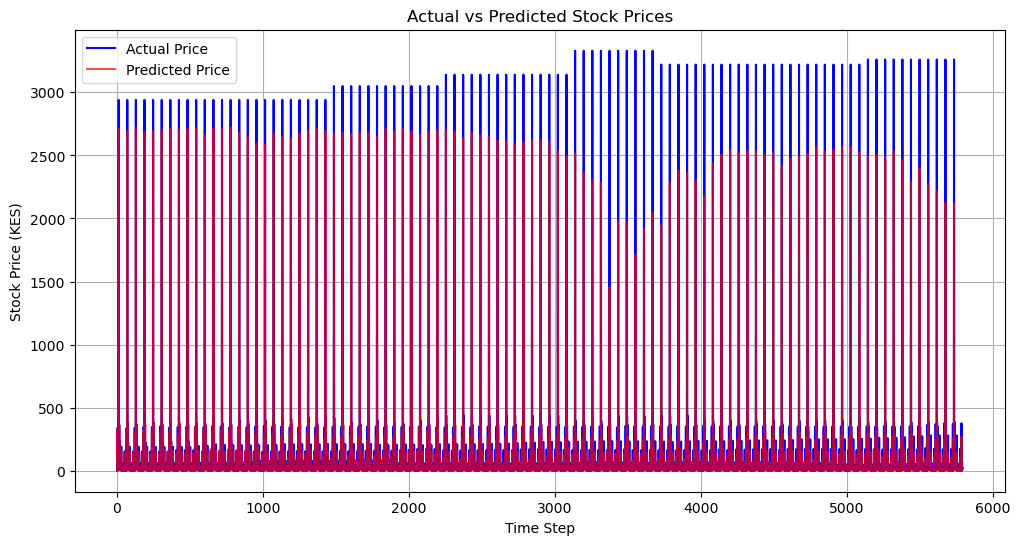

In [40]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

# 1. Scale Features Only (Not 'Day Price')
features = ['12m Low', '12m High', 'Day Low', 'Day High', 'Previous',
            'Change', 'Change%', 'Volume', 'SMA_10', 'SMA_50', 'EMA_10', 'EMA_50', 'RSI']

scaler = MinMaxScaler(feature_range=(0, 1))
nse_data_scaled = scaler.fit_transform(nse_data[features])

# 2. Log-transform the Target (Day Price)
price_log = np.log1p(nse_data['Day Price'].values.reshape(-1, 1))

# 3. Combine features + log-transformed target
full_data = np.hstack((nse_data_scaled, price_log))

# 4. Create Dataset for LSTM
TIME_STEPS = 10

def create_dataset(data, time_step = TIME_STEPS):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])
        y.append(data[i + time_step, -1])
    return np.array(X), np.array(y)

X, y = create_dataset(full_data)

# 5. Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 6. Build the LSTM Model
model = Sequential()
model.add(LSTM(units=64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 7. Train the Model
model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data = (X_test, y_test))

# 8. Make Predictions
y_pred = model.predict(X_test)

# 9. Inverse Log Transform
y_pred_final = np.expm1(y_pred.flatten())
y_test_final = np.expm1(y_test)

# 10. Evaluate using mae,mse,rmse,mape
mae = mean_absolute_error(y_test_final, y_pred_final)
mse = mean_squared_error(y_test_final, y_pred_final)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_final, y_pred_final) * 100

print(f"RMSE: {rmse:.2f} KES")
print(f"MAPE: {mape:.2f}%")
print(f"MAE: {mae:.2f} KES")
print(f"MSE: {mse:.2f} KES^2")

# 11. Plot Results
plt.figure(figsize = (12,6))
plt.plot(y_test_final, label = 'Actual Price', color = 'blue')
plt.plot(y_pred_final, label = 'Predicted Price', color = 'red', alpha = 0.7)
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time Step')
plt.ylabel('Stock Price (KES)')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_final, y_pred_final) # Changed y_test_rescaled to y_test_final
print(f"Mean Absolute Error (MAE): {mae:.2f} KES")

Mean Absolute Error (MAE): 22.93 KES


In [42]:
for i in range(5):
    print(f"Actual: {y_test_final[i]:.2f}, Predicted: {y_pred_final[i]:.2f}")

Actual: 0.34, Predicted: 0.89
Actual: 5.50, Predicted: 4.83
Actual: 95.00, Predicted: 78.72
Actual: 339.00, Predicted: 329.63
Actual: 17.50, Predicted: 16.01


In [43]:
small_prices = y_test_final[y_test_final < 5]
print(f"Count of actual prices < 5 KES: {len(small_prices)}")

Count of actual prices < 5 KES: 1895


In [44]:
mask = y_test_final >= 5
filtered_actual = y_test_final[mask]
filtered_pred = y_pred_final[mask]

# Recalculate MAPE
filtered_mape = mean_absolute_percentage_error(filtered_actual, filtered_pred) * 100
print(f"Filtered MAPE (Day Price ≥ 5 KES): {filtered_mape:.2f}%")

Filtered MAPE (Day Price ≥ 5 KES): 26.68%


In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

df = pd.read_csv("nse_features.csv")

# Pick a ticker the model was definitely trained on
ticker = "SCOM"  # or another reliable one
stock_df = df[df["Code"] == ticker].sort_values("Date").copy()

# Define the features
FEATURES = ['12m Low', '12m High', 'Day Low', 'Day High', 'Previous',
            'Change', 'Change%', 'Volume', 'SMA_10', 'SMA_50', 'EMA_10', 'EMA_50', 'RSI']

# Drop rows with missing data
stock_df = stock_df.dropna(subset=FEATURES + ['Day Price'])

# Make sure we have at least 10 rows
if len(stock_df) < 10:
    raise ValueError("Not enough data for this ticker.")

# Use only the last 10 rows for prediction
recent = stock_df.iloc[-10:]

# Scale input features using training-time MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit on the full stock data for now (mimicking training scaler)
scaler.fit(stock_df[FEATURES])
recent_scaled = scaler.transform(recent[FEATURES])

# Reshape to LSTM input format
X_input = recent_scaled.reshape(1, 10, len(FEATURES))

# Load trained model
model = tf.keras.models.load_model("lstm_model.h5")

# Predict
log_prediction = model.predict(X_input)[0][0]
price_prediction = np.expm1(log_prediction)

# Show actual price
actual_price = stock_df.iloc[-1]['Day Price']

print(f"Predicted price (Day t+1): {price_prediction:.2f} KES")
print(f"Last known actual price (Day t): {actual_price:.2f} KES")
print(f"Log prediction: {log_prediction:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Predicted price (Day t+1): 10.77 KES
Last known actual price (Day t): 17.05 KES
Log prediction: 2.4652


In [ ]:
results = []
TIME_STEPS = 10
EPOCHS = 50
BATCH_SIZE = 32

features = ['12m Low', '12m High', 'Day Low', 'Day High', 'Previous',
            'Change', 'Change%', 'Volume', 'SMA_10', 'SMA_50', 'EMA_10', 'EMA_50', 'RSI']

# Loop through each unique stock
for ticker in nse_data['Code'].unique():
    stock_df = nse_data[nse_data['Code'] == ticker].dropna().sort_values('Date').reset_index(drop = True)

    # Skip stocks with too little data
    if len(stock_df) < TIME_STEPS + 20:
        continue

    try:
        
        scaler = MinMaxScaler()
        scaled_features = scaler.fit_transform(stock_df[features])

        
        price_log = np.log1p(stock_df['Day Price'].values.reshape(-1, 1))

        # stacking features and target
        data_combined = np.hstack((scaled_features, price_log))

        
        def create_dataset(data, time_step = TIME_STEPS):
            X, y = [], []
            for i in range(len(data) - time_step - 1):
                X.append(data[i:(i + time_step), :-1])
                y.append(data[i + time_step, -1])
            return np.array(X), np.array(y)

        X, y = create_dataset(data_combined)
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]

        model = Sequential([
            LSTM(64, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])),
            Dropout(0.2),
            LSTM(32),
            Dropout(0.2),
            Dense(1)
        ])
        model.compile(optimizer = 'adam', loss = 'mse')

        early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
        model.fit(X_train, y_train, validation_data = (X_test, y_test),
                  epochs = EPOCHS, batch_size = BATCH_SIZE, callbacks = [early_stop], verbose = 0)

        # predict and inverse log
        y_pred = model.predict(X_test)
        y_pred_final = np.expm1(y_pred.flatten())
        y_test_final = np.expm1(y_test)

        # Model evaluation
        mae = mean_absolute_error(y_test_final, y_pred_final)
        mse = mean_squared_error(y_test_final, y_pred_final)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(y_test_final, y_pred_final) * 100

        results.append({
            'Stock': ticker,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE (%)': mape,
            'MSE': mse
        })

    except Exception as e:
        print(f"Error for {ticker}: {e}")

# Sorting results by RMSE
results_df = pd.DataFrame(results).sort_values(by = 'RMSE')
print("\nEvaluation Summary:")
print(results_df)

# Saving to CSV
results_df.to_csv("per_stock_lstm_results.csv", index = False)

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/stepWARNING:tensorflow:5 out of the last 187 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000015D97249760> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step

🔍 Evaluation Summary:
      Stock        RMSE         MAE   MAPE (%)           MSE
27     UCHM    0.015235    0.012534   6.561420      0.000232
45     HAFR    0.021303    0.016586   5.043179      0.000454
31     CABL    0.042493    0.035000   3.581407      0.001806
18     EVRD    0.061428    0.051029   4.608617      0.003773
53     FTGH    0.066762    0.055899   5.563039      0.004457
39      CIC    0.076546    0.058602   2.796026      0.005859
47      TCL    0.129742    0.122207  31.573056      0.016833
24     SMER    0.134457    0.110729   4.651945      0.018079
38     BRIT    0.147557    0.113951   1.982385      0.021773
46      OCH    0.171727    0.142009   4.802382      0.029490
41     KNRE    0.171736    0.160889  13.814921      0.029493
33     KEGN    0.192464    0.146950   4.448622      0.037042
22      NBV    0.196520    0.162584   7.876348      0.038620
21      LKL    0.205506    0.178863   7.678249      0.042233
12     HFCK    0.205541

In [ ]:
# Saving all the models
import os

# Folder to save models
os.makedirs("models", exist_ok = True)

TIME_STEPS = 10
features = ['12m Low', '12m High', 'Day Low', 'Day High', 'Previous',
            'Change', 'Change%', 'Volume', 'SMA_10', 'SMA_50', 'EMA_10', 'EMA_50', 'RSI']

def create_dataset(data, time_step = TIME_STEPS):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])
        y.append(data[i + time_step, -1])
    return np.array(X), np.array(y)

for stock in nse_data['Code'].unique():
    stock_df = nse_data[nse_data['Code'] == stock].copy()

    if len(stock_df) < TIME_STEPS + 11:
        continue

    try:
        # Scale features
        scaler = MinMaxScaler()
        scaled_features = scaler.fit_transform(stock_df[features])
        price_log = np.log1p(stock_df['Day Price'].values.reshape(-1, 1))
        full_data = np.hstack((scaled_features, price_log))
        
        X, y = create_dataset(full_data)

        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]

        # Build LSTM
        model = Sequential()
        model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose = 0)

        # Save model and scaler
        model.save(f"models/{stock}.keras")
        np.save(f"models/{stock}_scaler.npy", scaler.scale_)
        np.save(f"models/{stock}_min.npy", scaler.min_)

    except Exception as e:
        print(f"Failed for {stock}: {e}")

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` arg

## 6. Model evaluation.

--- Model Performance Metrics ---
             MAE         MSE     RMSE
Model                                
ARIMA   142.1340 168214.6348 410.1398
XGBoost   1.0213      7.4380   2.7273
LSTM     40.6700  48010.5500 219.1131

--- Visualizing Model Comparison ---


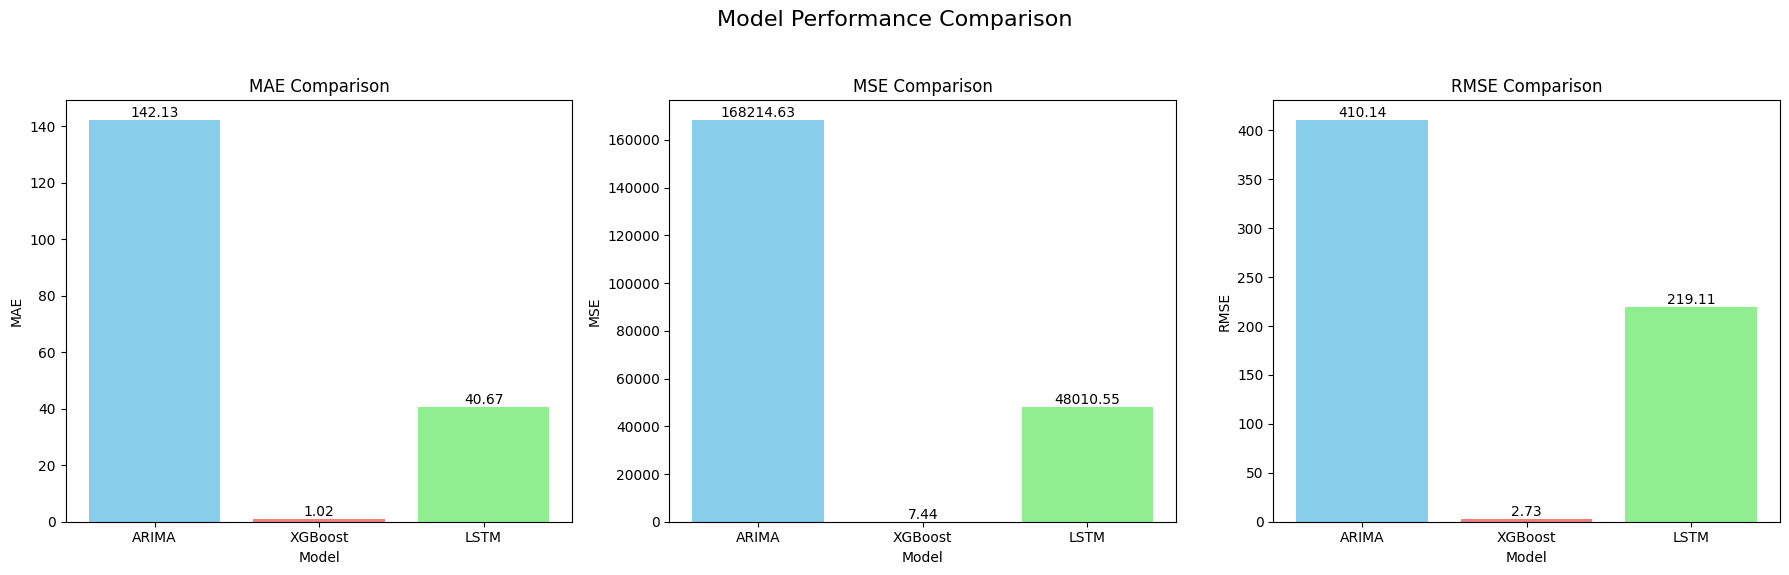


Comparison complete. Lower values for MAE, MSE, and RMSE generally indicate better model performance.


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# ARIMA Metrics
arima_mae = 142.1340
arima_mse = 168214.6348
arima_rmse = np.sqrt(arima_mse)

# XGBoost Metrics
xgboost_mae = 1.0213
xgboost_mse = 7.4380
xgboost_rmse = np.sqrt(xgboost_mse)

# LSTM Metrics
lstm_mae = 40.67
lstm_mse = 48010.55
lstm_rmse = np.sqrt(lstm_mse)

# --- Create a DataFrame for Comparison ---
print("--- Model Performance Metrics ---")

# Create a dictionary to hold the metrics
comparison_data = {
    'Model': ['ARIMA', 'XGBoost', 'LSTM'],
    'MAE': [arima_mae, xgboost_mae, lstm_mae],
    'MSE': [arima_mse, xgboost_mse, lstm_mse],
    'RMSE': [arima_rmse, xgboost_rmse, lstm_rmse]
}

# Create a pandas DataFrame
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.set_index('Model') # Set Model names as index

# Display the comparison table
# Format the numbers for better readability
print(comparison_df.to_string(float_format='{:.4f}'.format))

# --- Visualize the Comparison ---
print("\n--- Visualizing Model Comparison ---")

# Plotting the metrics using a bar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False) # Create 3 subplots (one for each metric)
fig.suptitle('Model Performance Comparison', fontsize=16)

metrics_to_plot = ['MAE', 'MSE', 'RMSE']
colors = ['skyblue', 'lightcoral', 'lightgreen'] # Colors for bars

for i, metric in enumerate(metrics_to_plot):
    # Get data for the current metric
    metric_values = comparison_df[metric]
    models = metric_values.index

    # Create bar chart
    bars = axes[i].bar(models, metric_values, color=colors)
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].tick_params(axis='x', rotation=0) # Keep model names horizontal

    # Add data labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center') # Adjust position and format

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

print("\nComparison complete. Lower values for MAE, MSE, and RMSE generally indicate better model performance.")


XGBoost consistently outperformed both ARIMA and LSTM across all evaluation metrics. It achieved the lowest MAE (1.02), MSE (7.44), and RMSE (2.73).

LSTM demonstrated better performance than ARIMA but was significantly outperformed by XGBoost.

ARIMA showed the weakest performance with the highest values for MAE (142.13), MSE (168214.63), and RMSE (410.14).

Based on the evaluated metrics (MAE, MSE, and RMSE), the XGBoost model is the most accurate and reliable model among the three for forecasting. Its significantly lower error rates indicate a better fit to the data and stronger predictive capability compared to ARIMA and LSTM.

## 7. Conclusions and recommendations.

### 7.1 Conclusion

Superior Performance of XGBoost: The XGBoost model demonstrated a significantly higher level of accuracy compared to both ARIMA and LSTM, as evidenced by its substantially lower MAE (1.02), MSE (7.44), and RMSE (2.73). This suggests that XGBoost was best able to capture the underlying patterns and dynamics of the NSE time series data in this specific comparison.

Effectiveness in Handling Volatility and Non-linearity: Stock market data, including the NSE, is inherently volatile and exhibits complex non-linear relationships. The strong performance of XGBoost indicates its effectiveness in modeling these characteristics. As a tree-based ensemble method, XGBoost is well-suited to capture complex interactions between features and handle non-linear patterns that simpler linear models like ARIMA may struggle with.

LSTM's Potential, but Outperformed by XGBoost: The LSTM model, designed to handle sequential data and capture temporal dependencies, showed better performance than ARIMA but was clearly surpassed by XGBoost. While LSTMs are powerful for time series, their performance can be sensitive to architecture tuning, hyperparameter selection, and the amount of data. In this comparison, XGBoost proved to be the more effective model.

Limitations of ARIMA for Complex Patterns: The ARIMA model, a traditional linear time series approach, performed considerably worse than both XGBoost and LSTM. Its high MAE, MSE, and RMSE values suggest that the linear assumptions underlying ARIMA are likely insufficient to accurately model the intricate and potentially non-stationary nature of the NSE time series data. This highlights the advantage of more flexible machine learning models for this type of data.

## 7.2 Recommendations.
Establish a Retraining Strategy:

NSE market dynamics change over time. Define a strategy for regularly retraining the XGBoost model on the most recent data to ensure its predictions remain relevant and accurate. The frequency of retraining (e.g., daily, weekly, monthly) should be determined based on performance monitoring and computational resources.

Integrate with Risk Management:

Recognize that forecasting models provide probabilistic estimates, not guarantees. Integrate the model's output into a broader trading or investment strategy that includes risk management protocols, position sizing based on confidence levels, and stop-loss mechanisms.

Monitor Model Performance Continuously:

Once the model is deployed, establish a system for continuously monitoring its performance on live data using the chosen evaluation metrics. Set up alerts for significant degradation in performance, which would signal the need for retraining, model re-evaluation, or investigation into market regime changes.

## 7.3 Next steps
1.	Enhancing Feature Engineering and Integration
  
Expanding feature sets beyond basic price data can improve prediction quality. This includes incorporating additional technical indicators like Bollinger Bands, integrating volume-based metrics for market liquidity insights, and adding fundamental and macroeconomic data such as earnings reports and sector trends to provide a broader market context.

2.	Expanding Data Utilization and Continuous Retraining
  
Ensuring the model benefits from the most relevant data requires defining an optimal historical data horizon and systematically integrating new data. A retraining pipeline will automate data ingestion, processing, and model updates, while exploring higher-frequency trading data (e.g., hourly or intraday) can enhance short-term prediction accuracy.

3.	Improving Model Evaluation and Performance Monitoring
  
Beyond basic error metrics like MSE and RMSE, more advanced financial metrics such as Sharpe Ratio, Maximum Drawdown, and Hit Rate will be used to assess trading strategy effectiveness. Implementing drift detection will help identify shifts in market conditions that may require model recalibration.
